In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
dt = pd.read_csv(r'/kaggle/input/stocks-ds/Minor-Project-Data-set-_Stock-Price-Prediction_.csv')
dt

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


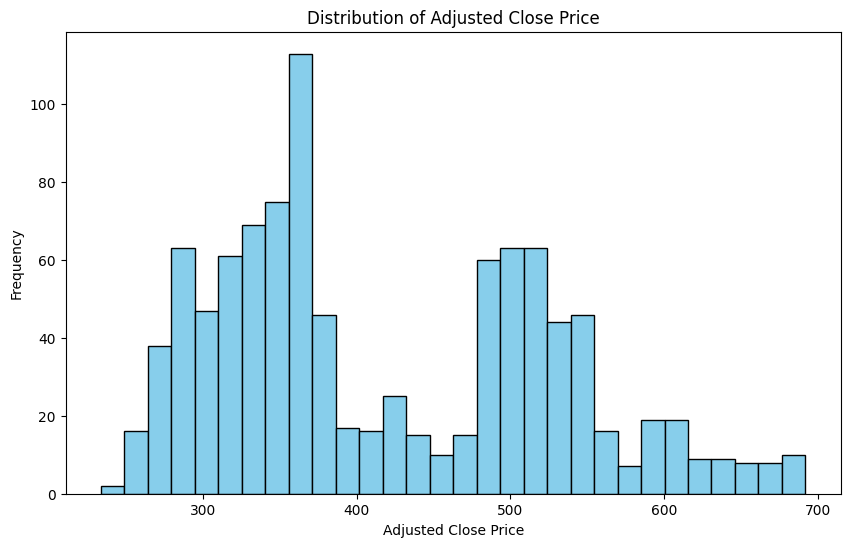

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(dt['Adj Close'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

In [5]:
dt['Date'] = pd.to_datetime(dt['Date'])

In [6]:
dt.drop_duplicates(inplace=True)

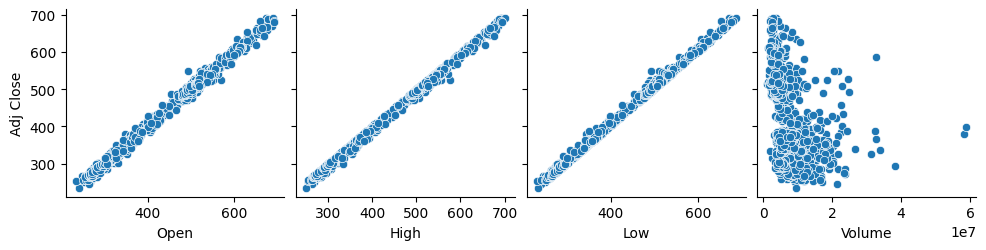

In [7]:
sns.pairplot(data=dt, x_vars=['Open', 'High', 'Low', 'Volume'], y_vars='Adj Close', kind='scatter')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


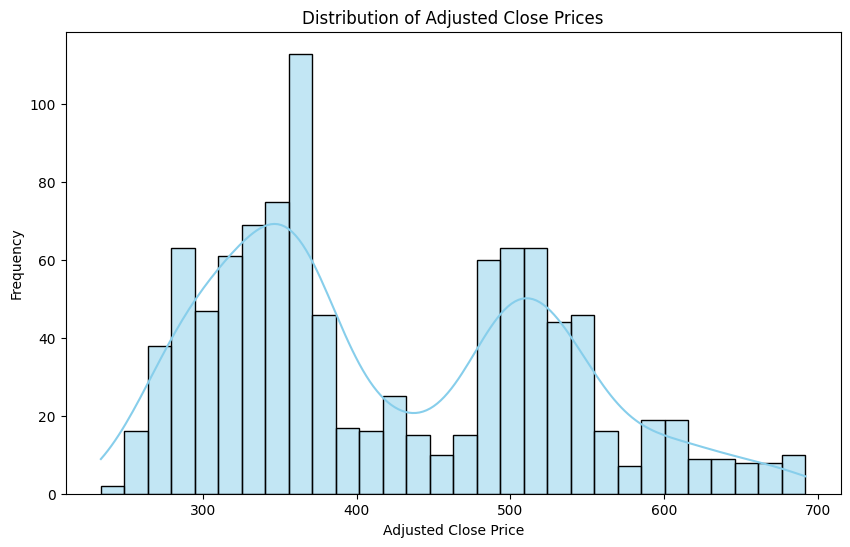

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['Adj Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

In [9]:
dt['MA_7'] = dt['Adj Close'].rolling(window=7).mean()
dt['MA_30'] = dt['Adj Close'].rolling(window=30).mean()

In [10]:
dt['Day'] = dt['Date'].dt.day
dt['Month'] = dt['Date'].dt.month
dt['Year'] = dt['Date'].dt.year

In [12]:
#SARIMA
p = 1
d = 1
q = 1
m = 12

train_size = int(len(dt) * 0.8)
train_data, test_data = dt.iloc[:train_size], dt.iloc[train_size:]  

#SARIMA model
sarima_model = SARIMAX(train_data['Adj Close'], order=(p, d, q), seasonal_order=(p, d, q, m))
sarima_result = sarima_model.fit()

sarima_pred = sarima_result.forecast(steps=len(test_data))
mae_sarima = np.mean(np.abs(sarima_pred - test_data['Adj Close']))
print("Mean Absolute Error (SARIMA):", mae_sarima)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85402D+00    |proj g|=  7.76376D-02


 This problem is unconstrained.



At iterate    5    f=  3.75731D+00    |proj g|=  2.18240D-02

At iterate   10    f=  3.73281D+00    |proj g|=  8.25142D-04

At iterate   15    f=  3.73259D+00    |proj g|=  1.80542D-02

At iterate   20    f=  3.73177D+00    |proj g|=  2.76510D-04

At iterate   25    f=  3.73176D+00    |proj g|=  6.44100D-04

At iterate   30    f=  3.73167D+00    |proj g|=  2.73699D-03

At iterate   35    f=  3.73163D+00    |proj g|=  2.23820D-04

At iterate   40    f=  3.73162D+00    |proj g|=  2.12367D-05

At iterate   45    f=  3.73162D+00    |proj g|=  1.33476D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     55   

In [14]:
#training and testing data
train_size = int(len(dt) * 0.7)
val_size = int(len(dt) * 0.2)
test_size = len(dt) - train_size - val_size
train_data, val_data, test_data = dt.iloc[:train_size], dt.iloc[train_size:train_size+val_size], dt.iloc[train_size+val_size:]


sarima_model = SARIMAX(train_data['Adj Close'], order=(p, d, q), seasonal_order=(p, d, q, m))
sarima_result = sarima_model.fit()

sarima_pred_val = sarima_result.forecast(steps=len(val_data))
mae_val = np.mean(np.abs(sarima_pred_val - val_data['Adj Close']))
print("Mean Absolute Error (Validation):", mae_val)

sarima_pred_test = sarima_result.forecast(steps=len(test_data))
mae_test = np.mean(np.abs(sarima_pred_test - test_data['Adj Close']))
print("Mean Absolute Error (Testing):", mae_test)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79318D+00    |proj g|=  7.97667D-02

At iterate    5    f=  3.71883D+00    |proj g|=  4.24056D-02

At iterate   10    f=  3.67518D+00    |proj g|=  6.73809D-04

At iterate   15    f=  3.67514D+00    |proj g|=  1.38525D-04

At iterate   20    f=  3.67511D+00    |proj g|=  3.32379D-03

At iterate   25    f=  3.67501D+00    |proj g|=  1.35238D-03

At iterate   30    f=  3.67500D+00    |proj g|=  3.14068D-04

At iterate   35    f=  3.67500D+00    |proj g|=  1.23185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [16]:
#final sarima model
train_val_data = pd.concat([train_data, val_data])

sarima_model_final = SARIMAX(train_val_data['Adj Close'], order=(p, d, q), seasonal_order=(p, d, q, m))
sarima_result_final = sarima_model_final.fit()

sarima_pred_test_final = sarima_result_final.forecast(steps=len(test_data))
mae_test_final = np.mean(np.abs(sarima_pred_test_final - test_data['Adj Close']))
print("Final Mean Absolute Error (Testing):", mae_test_final)




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83470D+00    |proj g|=  7.80354D-02


 This problem is unconstrained.



At iterate    5    f=  3.73230D+00    |proj g|=  3.16395D-02

At iterate   10    f=  3.71066D+00    |proj g|=  3.02656D-04

At iterate   15    f=  3.71037D+00    |proj g|=  2.25954D-02

At iterate   20    f=  3.70969D+00    |proj g|=  5.97874D-04

At iterate   25    f=  3.70969D+00    |proj g|=  6.04844D-04

At iterate   30    f=  3.70964D+00    |proj g|=  7.53623D-04

At iterate   35    f=  3.70961D+00    |proj g|=  3.46051D-04

At iterate   40    f=  3.70960D+00    |proj g|=  4.29745D-05

At iterate   45    f=  3.70960D+00    |proj g|=  1.72494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     55   

In [23]:
#forecast for future time periods
future_periods = 30
last_date = dt.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_periods + 1)
future_dates = future_dates[1:]
sarima_forecast = pd.Series(sarima_result_final.forecast(steps=future_periods))
print("SARIMA Forecast for Future Time Periods:")
print(sarima_forecast)



SARIMA Forecast for Future Time Periods:
907    599.773488
908    601.185398
909    602.486426
910    604.723803
911    605.097405
912    606.272418
913    606.656182
914    606.602756
915    607.145061
916    606.464550
917    606.165900
918    605.333011
919    607.106501
920    608.201353
921    609.290237
922    611.124767
923    611.456700
924    611.937472
925    612.048986
926    611.849595
927    611.587539
928    610.885988
929    611.038622
930    610.088131
931    611.907569
932    612.979998
933    614.061635
934    615.871802
935    616.203650
936    616.645945
Name: predicted_mean, dtype: float64
